In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
df = pd.read_csv(r'1954319_113821.csv', parse_dates = ['historybegdate'], index_col = ['historybegdate'])
df.head()


,partid,locid,historyamount
historybegdate,,,
2015-07-04,1954319,113821,201
2015-07-11,1954319,113821,200
2015-07-18,1954319,113821,18
2015-07-25,1954319,113821,226
2015-08-01,1954319,113821,320


In [7]:
df = df.drop(['locid'],axis=1)
df = df.drop(['partid'],axis=1)

df

,historyamount
historybegdate,
2015-07-04,201
2015-07-11,200
2015-07-18,18
2015-07-25,226
2015-08-01,320
2015-08-08,329
2015-08-15,418
2015-08-22,571
2015-08-29,464


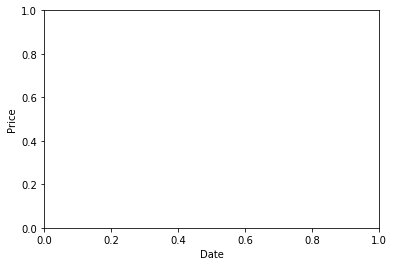

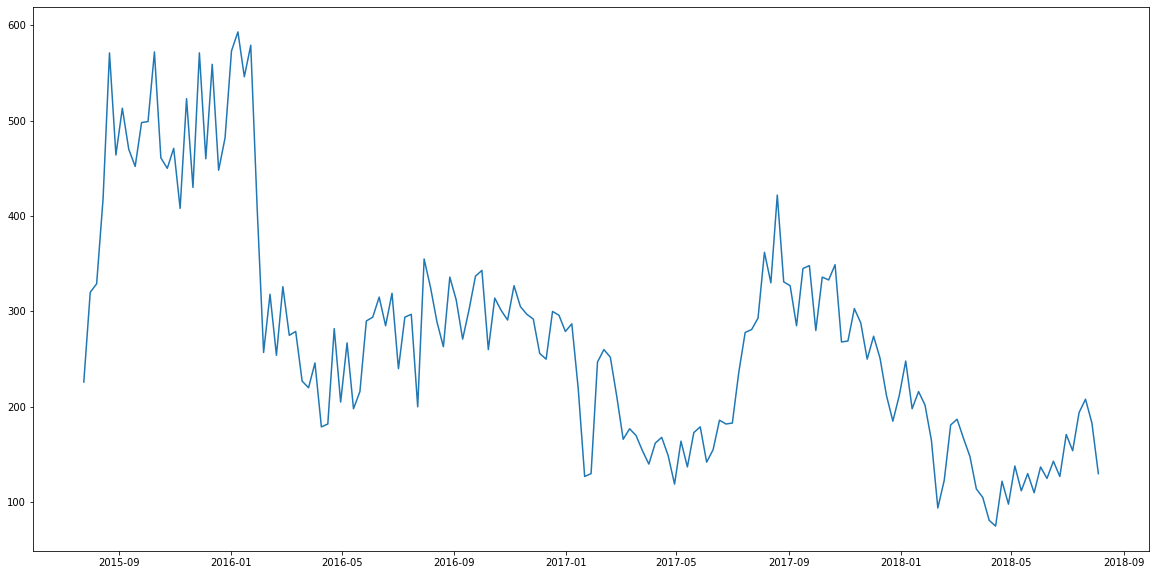

In [8]:
df = df.iloc[3:]
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

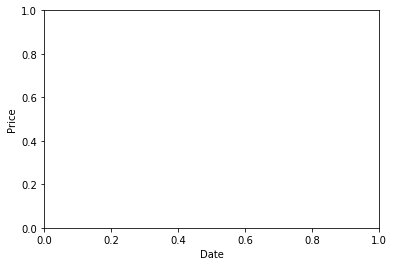

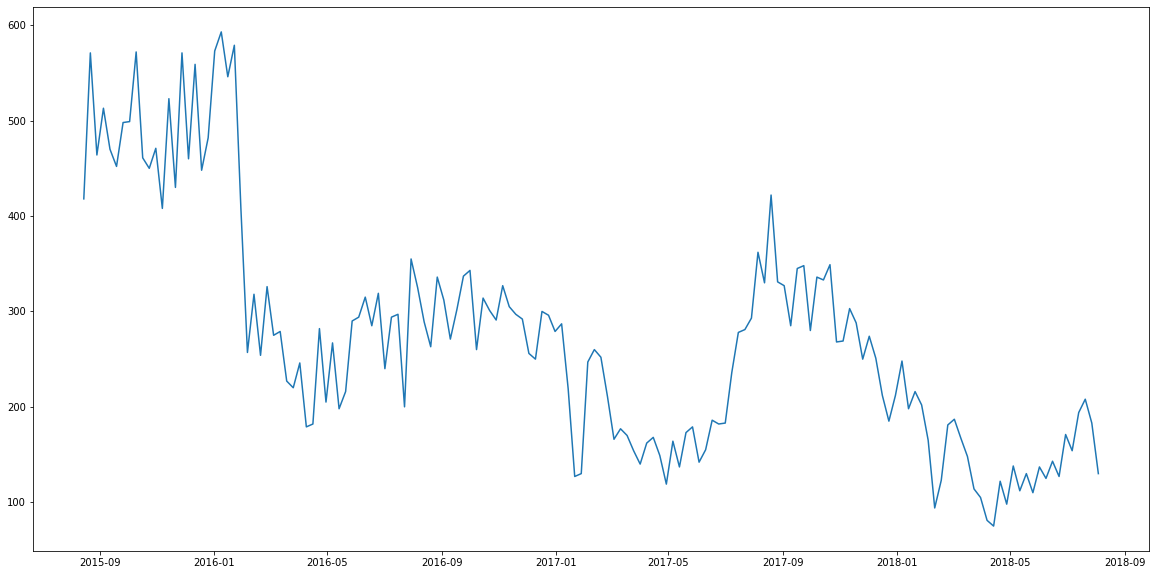

In [9]:
df = df.iloc[3:]
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

In [10]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
print(rolling_mean.head(20))
print(len(rolling_mean))

                historyamount
historybegdate               
2015-08-15                NaN
2015-08-22                NaN
2015-08-29                NaN
2015-09-05                NaN
2015-09-12                NaN
2015-09-19                NaN
2015-09-26                NaN
2015-10-03                NaN
2015-10-10                NaN
2015-10-17                NaN
2015-10-24                NaN
2015-10-31         486.583333
2015-11-07         485.750000
2015-11-14         481.750000
2015-11-21         478.916667
2015-11-28         483.750000
2015-12-05         482.916667
2015-12-12         491.833333
2015-12-19         487.666667
2015-12-26         486.250000
156


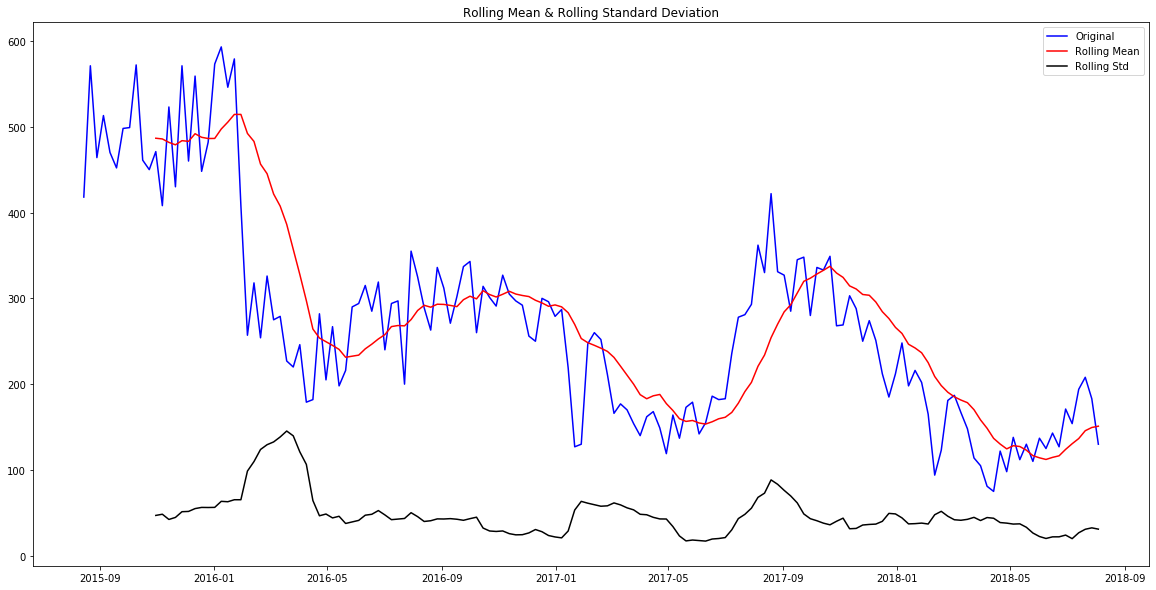

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [12]:
result = adfuller(df['historyamount'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('No. OF Lags USed: {}'.format(result[2]))
print('No. OF Observations USed: {}'.format(result[3]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.3376403371351633
p-value: 0.16011534860745896
No. OF Lags USed: 1
No. OF Observations USed: 154
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677


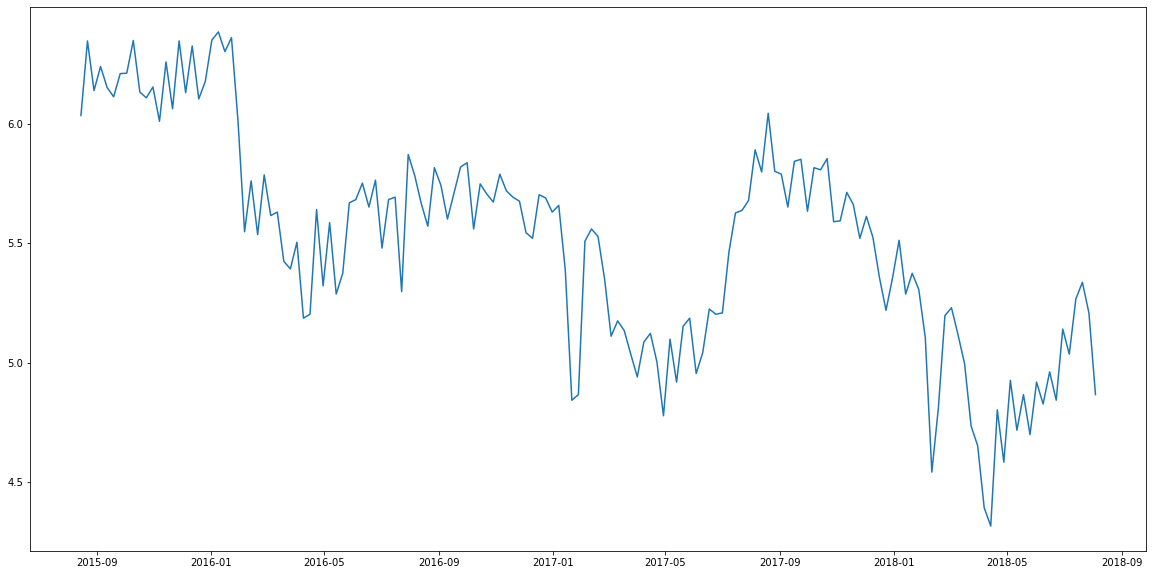

In [13]:
df_log = np.log(df)
plt.figure(figsize=(20,10))
plt.plot(df_log)

In [14]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    plt.figure(figsize=(20,10))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['historyamount'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('No. OF Lags USed: {}'.format(result[2]))
    print('No. OF Observations USed: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

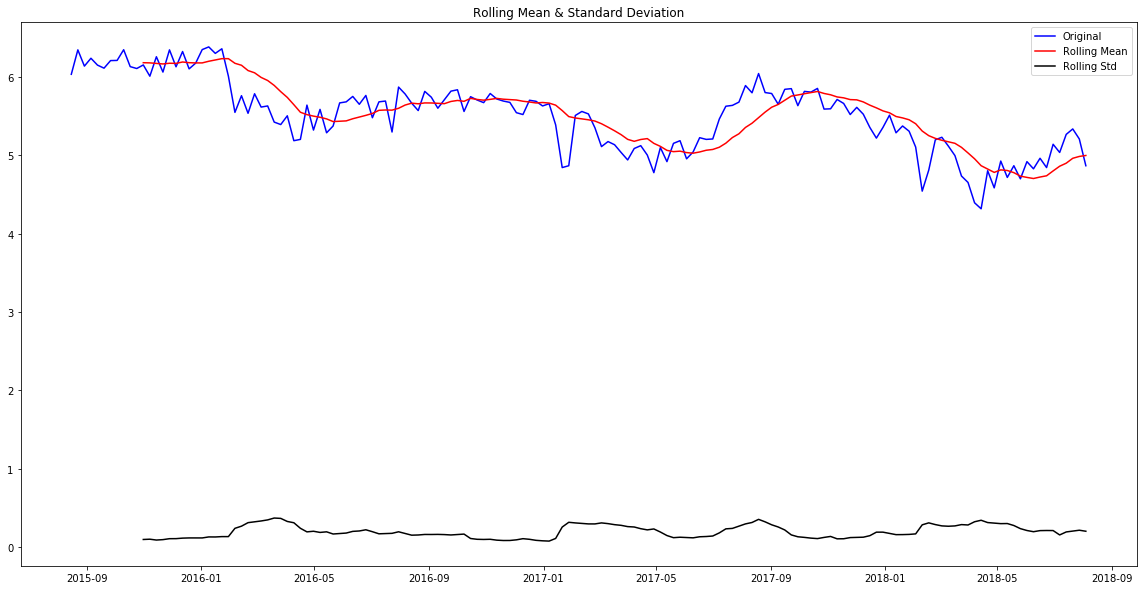

ADF Statistic: -2.3152924905068906
p-value: 0.16708326343501012
No. OF Lags USed: 1
No. OF Observations USed: 154
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677


In [15]:
#Taking Data with log scale 
get_stationarity(df_log)
#Can see data nt ststionary with p value and ADF Statistics 

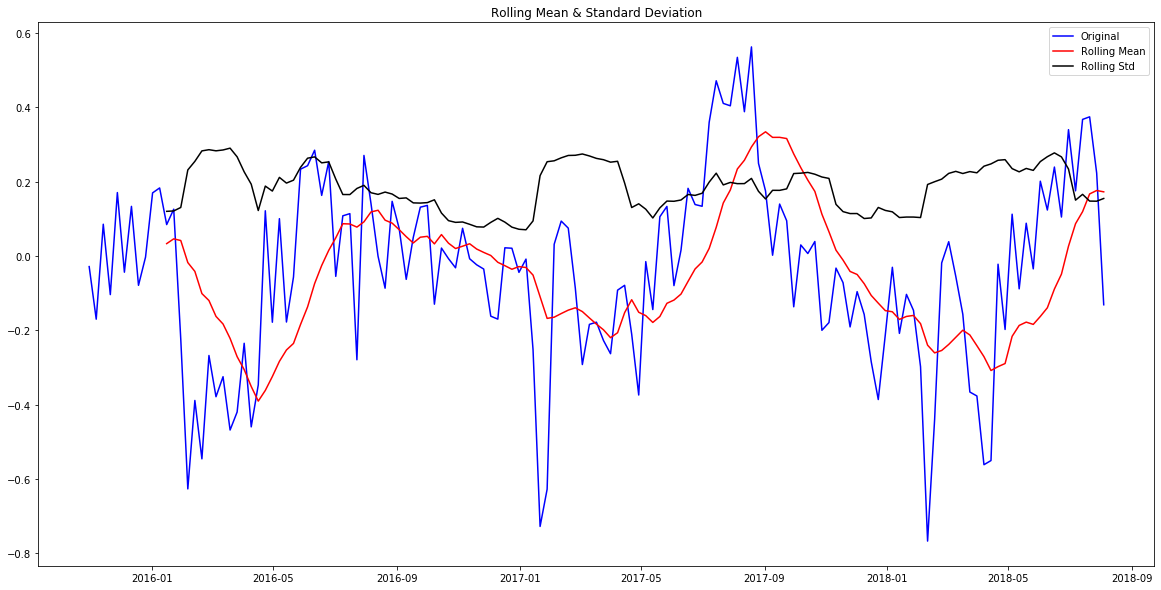

ADF Statistic: -4.199517359761719
p-value: 0.0006601408145904234
No. OF Lags USed: 1
No. OF Observations USed: 143
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


In [16]:
#Deducting the mean of log values from log data set 
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)
# This is giving us good  results as p value is extremely low and hence data is quite stationary 

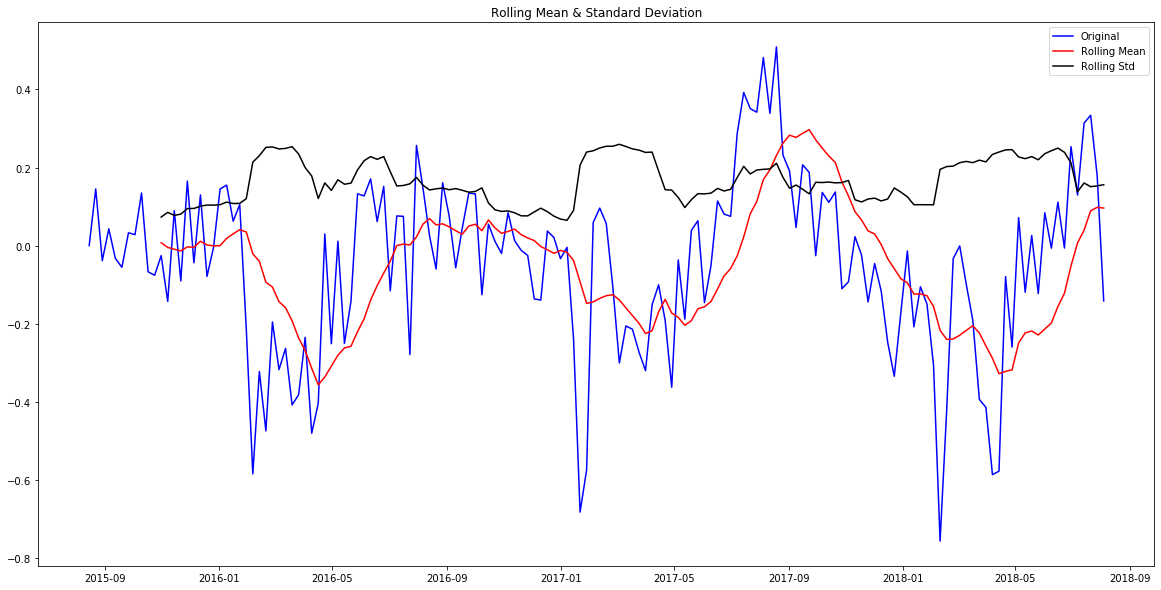

ADF Statistic: -4.460707885634956
p-value: 0.00023141126583750525
No. OF Lags USed: 1
No. OF Observations USed: 154
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677


In [17]:
#Subtracting exponential decay mean from log data 
rolling_mean_exp_decay = df_log.ewm(halflife=5, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
get_stationarity(df_log_exp_decay)
#THis looks like best result as our p value is low and from adf statistics we can say that we are 95% sure that 
#data is stationary

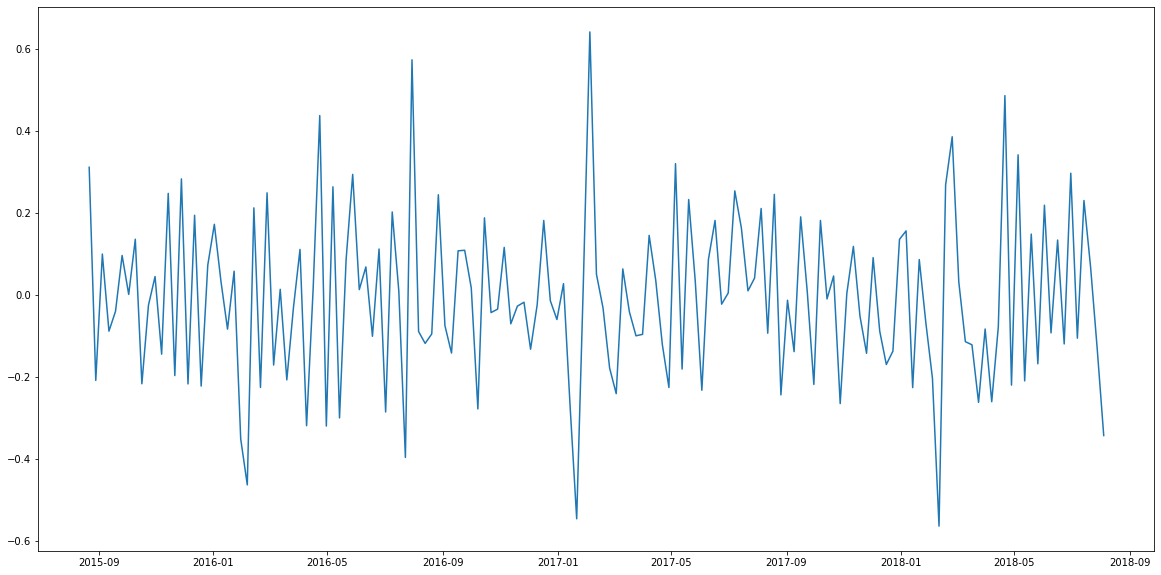

In [18]:
df_log_shift = df_log - df_log.shift()
plt.figure(figsize=(20,10))
plt.plot(df_log_shift)

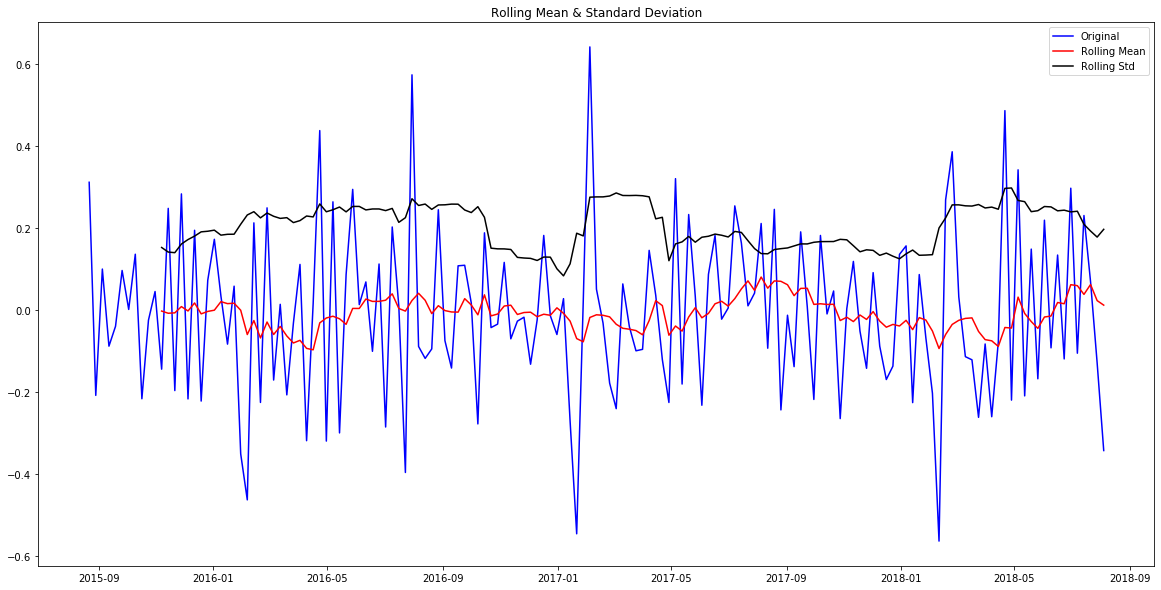

ADF Statistic: -9.28102791025512
p-value: 1.2510356090645716e-15
No. OF Lags USed: 2
No. OF Observations USed: 152
Critical Values:
	1%: -3.474120870218417
	5%: -2.880749791423677
	10%: -2.5770126333102494


In [19]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
#Very much staionary as p value is extremely low and 99% confidence that data is staionary 

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')#ordinary least square method


c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function')

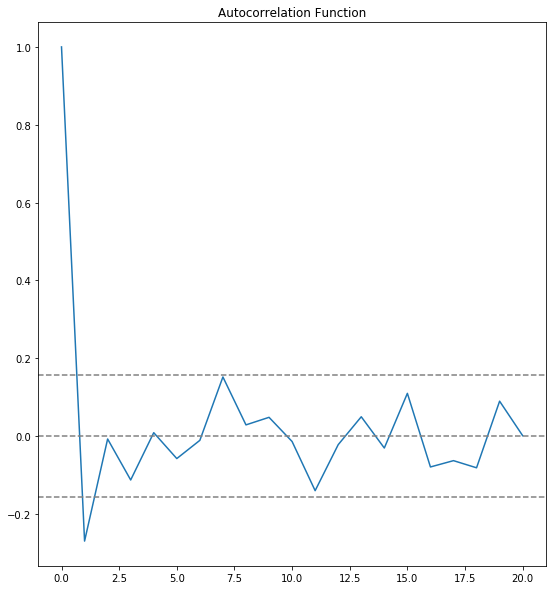

In [21]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#q= The lag value where the ACF chart crosses the upper confidence interval for the first time.
#If you notice closely, in this case q=1.

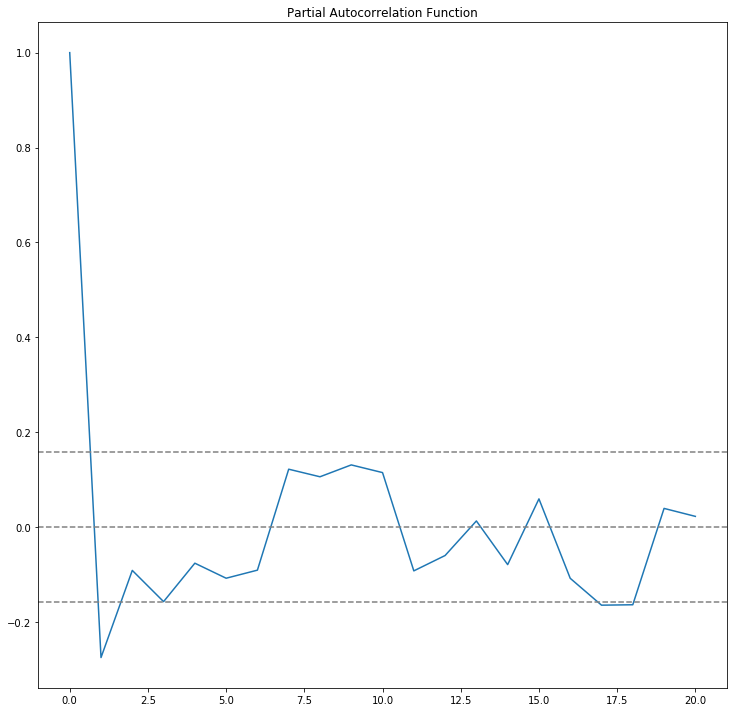

In [22]:
#Plot PACF:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
#If you notice closely, in this case p=1.

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


Plotting AR Model


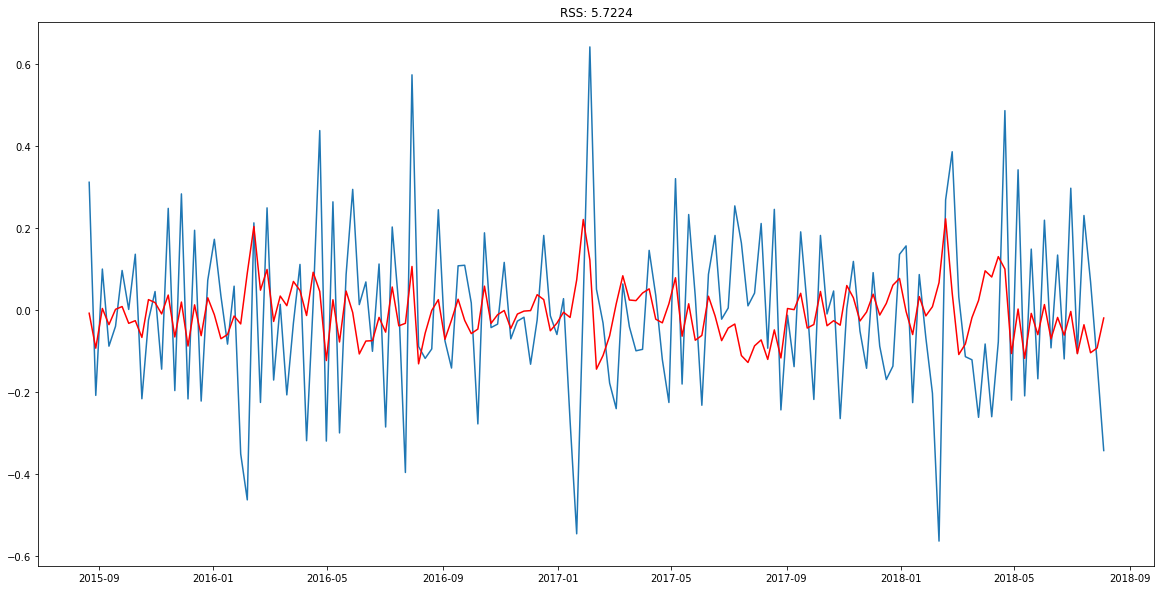

In [23]:
# Applying ARIMA model
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(1,1,1))# (p,d,q)
results = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
#plt.title(sum(results.fittedvalues-df_log_shift['historyamount'])**2)
plt.title('RSS: %.4f'% sum((results.fittedvalues-df_log_shift['historyamount'])**2))
print('Plotting AR Model')

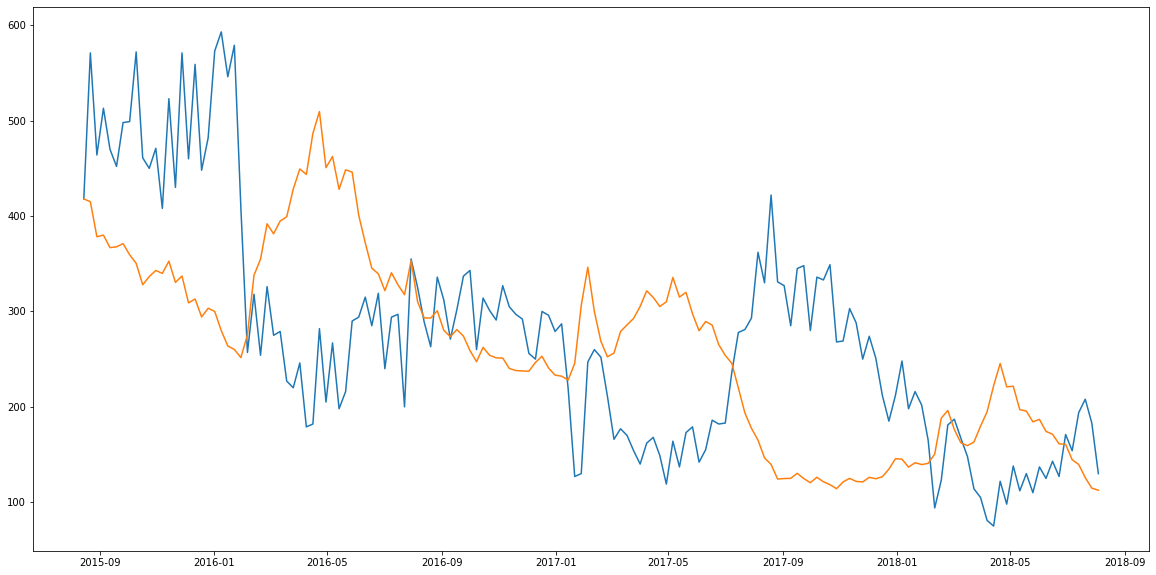

In [24]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['historyamount'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(df)
plt.plot(predictions_ARIMA)

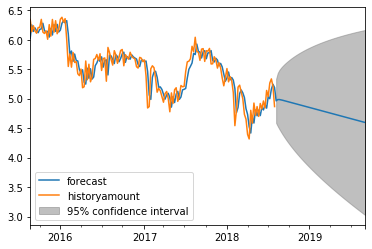

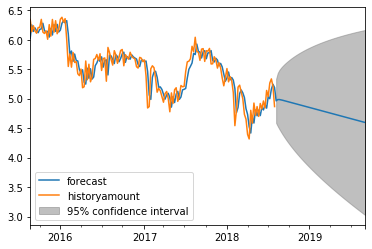

In [25]:
results.plot_predict(1,212)